In [ ]:
import pandas as pd
from sklearn.utils import shuffle

def create_balanced_news_df(fake_file, true_file_full, true_file_partial, output_file):
    """
    Combines data from three files to create a balanced and shuffled news dataset.

    Args:
        fake_file (str): Path to the fake news CSV file (20k records).
        true_file_full (str): Path to the true news Excel file from web scraping (~7k records).
        true_file_partial (str): Path to the true news CSV file (20k records, sample 13k).
        output_file (str): Path to save the combined and shuffled Excel file.
    """
    try:
        # Load the datasets
        fake_df = pd.read_csv(fake_file)
        true_df_full = pd.read_excel(true_file_full)
        true_df_partial = pd.read_csv(true_file_partial)

        # --- Step 1: Process fake news ---
        fake_df = fake_df.rename(columns={"text": "content"})[["title", "content"]]
        fake_df["label"] = 1  # Label for fake news

        # --- Step 2: Process full true news (from web-scraped file) ---
        if 'content' in true_df_full.columns:
            true_df_full = true_df_full.drop(columns=['content'])  # Remove old content if exists
        true_df_full = true_df_full.rename(columns={"full_article": "content"})[["title", "content"]]
        true_df_full["label"] = 0  # Label for true news

        # --- Step 3: Process partial true news and sample 13k ---
        true_df_partial = true_df_partial.rename(columns={"text": "content"})[["title", "content"]]
        true_df_partial["label"] = 0  # Label for true news
        true_df_sampled = true_df_partial.sample(n=13000, random_state=42)

        # --- Step 4: Combine all data ---
        merged_df = pd.concat([fake_df, true_df_full, true_df_sampled], ignore_index=True)

        # --- Step 5: Shuffle the data ---
        shuffled_df = shuffle(merged_df, random_state=42).reset_index(drop=True)

        # --- Step 6: Save to Excel ---
        shuffled_df.to_excel(output_file, index=False)

        print(f"✅ Balanced and shuffled dataset saved successfully as '{output_file}'")
        return shuffled_df

    except FileNotFoundError:
        print("❌ Error: One or more of the input files were not found.")
        return None
    except KeyError as e:
        print(f"❌ Error: Column '{e}' not found in one of the files. Please ensure column names are correct.")
        return None
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")
        return None

# File paths
fake_file_path = '/content/Fake.csv'
true_file_full_path = '/content/Cleaned_Real_News_Articles.xlsx'
true_file_partial_path = '/content/True.csv'
output_file_path = '/content/balanced_news_dataset.xlsx'

# Run the function
balanced_df = create_balanced_news_df(fake_file_path, true_file_full_path, true_file_partial_path, output_file_path)

if balanced_df is not None:
    print("\n🧾 Head of the balanced and shuffled DataFrame:")
    print(balanced_df.head())

    print("\n📊 Label distribution in the balanced DataFrame:")
    print(balanced_df['label'].value_counts())


✅ Balanced and shuffled dataset saved successfully as '/content/balanced_news_dataset.xlsx'

🧾 Head of the balanced and shuffled DataFrame:
                                               title  \
0  Obama to seek 1.6 percent pay raise for federa...   
1   Republican Committee Passes Bill That Would P...   
2  Trump briefly discussed rights with Philippine...   
3  BREAKING: PLANNED PARENTHOOD PULLS A LAME PR S...   
4  DIAMOND AND SILK Go Off On Michelle Obama For ...   

                                             content  label  
0  WASHINGTON (Reuters) - The Obama administratio...      0  
1  Florida Republicans  war on women is going str...      1  
2  MANILA (Reuters) - U.S. President Donald Trump...      0  
3  Desperation has set in and Planned parenthood ...      1  
4  .@DiamondandSilk watched Oprah s interview wit...      1  

📊 Label distribution in the balanced DataFrame:
label
1    23481
0    19989
Name: count, dtype: int64


In [ ]:
balanced_df.head()

,title,content,label
0,Obama to seek 1.6 percent pay raise for federa...,WASHINGTON (Reuters) - The Obama administratio...,0
1,Republican Committee Passes Bill That Would P...,Florida Republicans war on women is going str...,1
2,Trump briefly discussed rights with Philippine...,MANILA (Reuters) - U.S. President Donald Trump...,0
3,BREAKING: PLANNED PARENTHOOD PULLS A LAME PR S...,Desperation has set in and Planned parenthood ...,1
4,DIAMOND AND SILK Go Off On Michelle Obama For ...,.@DiamondandSilk watched Oprah s interview wit...,1


In [ ]:
balanced_df.value_counts('label')

,count
label,
1,23481
0,19989


In [ ]:
result_df = balanced_df

In [ ]:
import pandas as pd

def dataframe_to_excel(df, output_file):
    """
    Converts a Pandas DataFrame to an Excel file.

    Args:
        df (pd.DataFrame): The DataFrame to convert.
        output_file (str): The path to save the Excel file.
    """
    try:
        df.to_excel(output_file, index=False)
        print(f"DataFrame saved successfully to '{output_file}'")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (assuming you have a DataFrame called 'result_df'):
# dataframe_to_excel(result_df, 'output_dataframe.xlsx')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def perform_eda(df):
    """
    Performs Exploratory Data Analysis (EDA) on the news dataset.

    Args:
        df (pd.DataFrame): The news dataset as a Pandas DataFrame.
    """

    print("--- Dataset Overview ---")
    print(df.info())
    print("\n--- Summary Statistics ---")
    print(df.describe(include='all'))

    # Check for missing values
    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    # Class Distribution
    print("\n--- Class Distribution ---")
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Fake and Real News')
    plt.show()

    # Text Length Analysis
    df['content'] = df['content'].fillna("") #Fill NA values.
    df['text_length'] = df['content'].apply(len)
    print("\n--- Text Length Analysis ---")
    print(df['text_length'].describe())
    sns.histplot(df['text_length'], bins=50)
    plt.title('Distribution of Text Lengths')
    plt.show()

    # Title Length Analysis
    df['title'] = df['title'].fillna("") #Fill NA values.
    df['title_length'] = df['title'].apply(len)
    print("\n--- Title Length Analysis ---")
    print(df['title_length'].describe())
    sns.histplot(df['title_length'], bins=50)
    plt.title('Distribution of Title Lengths')
    plt.show()

    # Text Length vs. Label
    sns.boxplot(x='label', y='text_length', data=df)
    plt.title('Text Length vs. Label')
    plt.show()

    # Title Length vs. Label
    sns.boxplot(x='label', y='title_length', data=df)
    plt.title('Title Length vs. Label')
    plt.show()

    # Word Count Analysis
    df['word_count'] = df['content'].apply(lambda x: len(str(x).split())) #added str()
    print("\n--- Word Count Analysis ---")
    print(df['word_count'].describe())
    sns.histplot(df['word_count'], bins=50)
    plt.title('Distribution of Word Counts')
    plt.show()

    # Word count vs Label
    sns.boxplot(x='label', y='word_count', data=df)
    plt.title('Word Count vs. Label')
    plt.show()

    def get_top_words(text, n=20):
        words = ' '.join(text).lower().split()
        words = [word for word in words if word not in stop_words and word.isalpha()]
        return Counter(words).most_common(n)

    print("\n--- Top Words in Fake News ---")
    print(get_top_words(df[df['label'] == 1]['content']))

    print("\n--- Top Words in Real News ---")
    print(get_top_words(df[df['label'] == 0]['content']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43470 entries, 0 to 43469
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    43469 non-null  object
 1   content  43470 non-null  object
 2   label    43470 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1019.0+ KB
None

--- Summary Statistics ---
                                                    title content  \
count                                               43469   43470   
unique                                              37418   37033   
top     Factbox: Trump fills top jobs for his administ...           
freq                                                    9     627   
mean                                                  NaN     NaN   
std                                                   NaN     NaN   
min                                                   NaN     NaN   
25%                                         

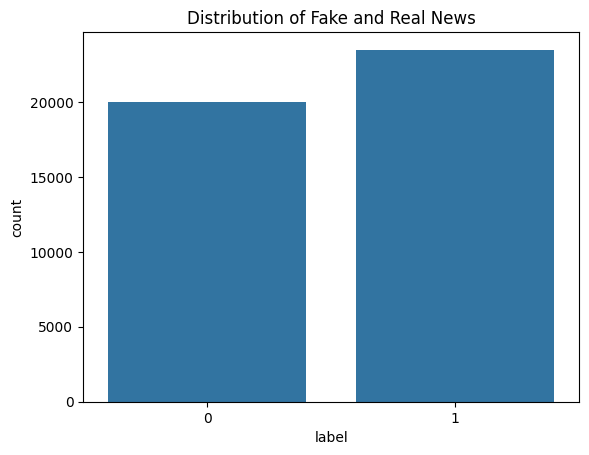


--- Text Length Analysis ---
count    43470.000000
mean      2727.419646
std       2445.882320
min          1.000000
25%       1457.000000
50%       2318.000000
75%       3374.000000
max      51794.000000
Name: text_length, dtype: float64


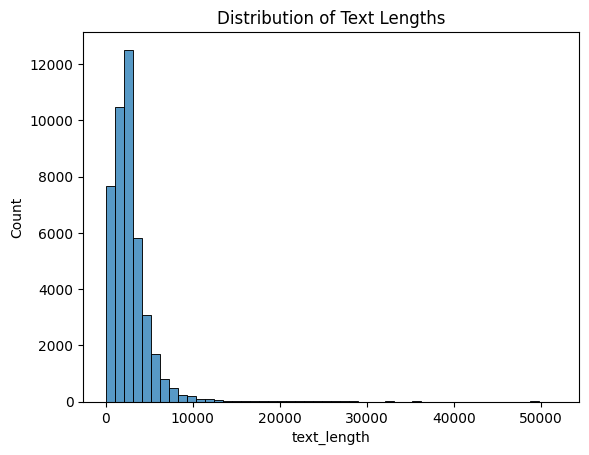


--- Title Length Analysis ---
count    43470.000000
mean        83.576329
std         25.347080
min          0.000000
25%         66.000000
50%         79.000000
75%         95.000000
max        286.000000
Name: title_length, dtype: float64


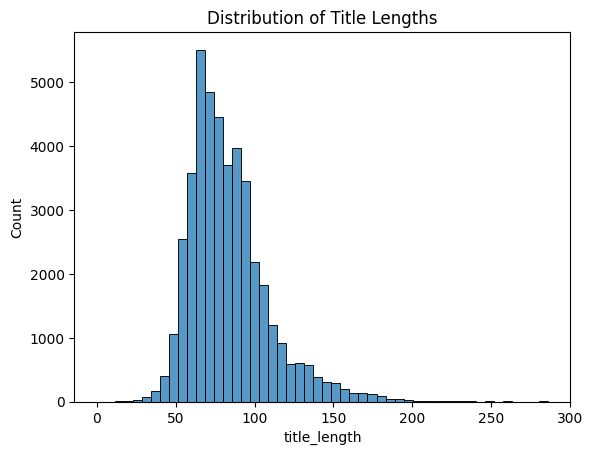

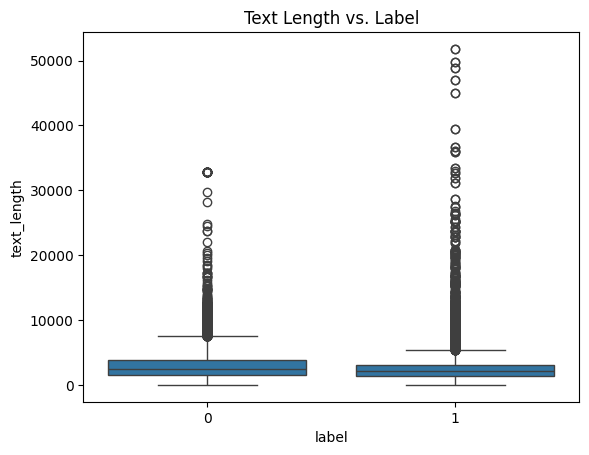

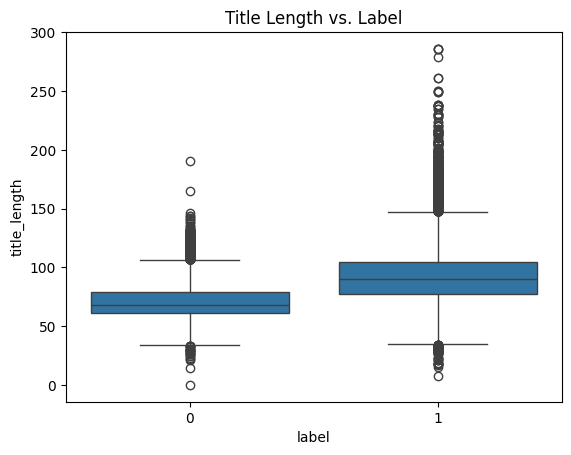


--- Word Count Analysis ---
count    43470.000000
mean       446.792340
std        393.763479
min          0.000000
25%        241.000000
50%        383.000000
75%        555.000000
max       8135.000000
Name: word_count, dtype: float64


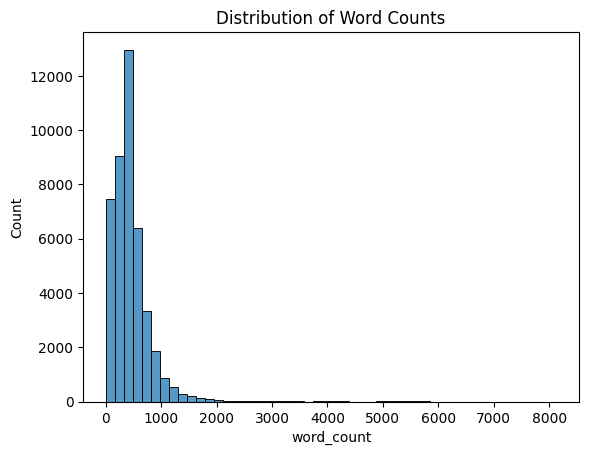

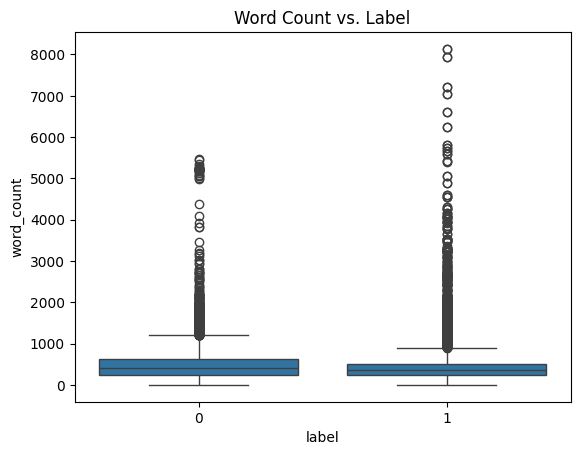


--- Top Words in Fake News ---
[('trump', 65511), ('would', 23261), ('people', 22359), ('president', 22080), ('one', 21561), ('said', 21221), ('like', 16858), ('donald', 16800), ('obama', 16043), ('clinton', 15614), ('also', 14771), ('new', 13941), ('even', 13515), ('hillary', 12584), ('white', 12235), ('news', 12123), ('us', 11811), ('state', 10833), ('get', 10603), ('could', 10084)]

--- Top Words in Real News ---
[('said', 64630), ('trump', 35049), ('would', 27606), ('president', 21946), ('also', 19851), ('new', 17959), ('told', 15835), ('one', 14780), ('people', 14292), ('state', 13693), ('could', 13683), ('last', 13567), ('government', 13483), ('house', 13447), ('united', 12609), ('two', 11914), ('first', 10877), ('news', 10669), ('according', 10536), ('republican', 10131)]


In [ ]:
perform_eda(result_df)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE

# Download the punkt_tab resource BEFORE using word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')

def nlp_preprocessing(df):
    """
    Performs NLP preprocessing on the news dataset.

    Args:
        df (pd.DataFrame): The news dataset as a Pandas DataFrame.

    Returns:
        pd.DataFrame: The preprocessed dataset.
    """

    # 1. Text Cleaning and Tokenization
    df['cleaned_content'] = df['content'].apply(lambda text: ' '.join([word.lower() for word in word_tokenize(str(text)) if word.isalpha()]))

    # 2. Remove Stop Words
    stop_words = set(stopwords.words('english'))
    df['cleaned_content'] = df['cleaned_content'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stop_words]))

    # 3. TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_content'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # 4. Dimensionality Reduction (SVD)
    svd = TruncatedSVD(n_components=300)  # Adjust n_components as needed
    svd_matrix = svd.fit_transform(tfidf_df)
    svd_df = pd.DataFrame(svd_matrix, columns=[f'svd_{i}' for i in range(svd_matrix.shape[1])])

    # 5. Label Encoding
    label_encoder = LabelEncoder()
    df['encoded_label'] = label_encoder.fit_transform(df['label'])

    # 6. Combine Features
    final_df = pd.concat([df, svd_df], axis=1)

    return final_df, tfidf_vectorizer, label_encoder

# Example Usage:
# Assuming your DataFrame is named 'result_df'
# processed_df, tfidf_vectorizer, label_encoder = nlp_preprocessing(result_df)
# print(processed_df.head())

def balance_dataset(df, features_cols, target_col):
    """
    Balances the dataset using SMOTE.

    Args:
        df (pd.DataFrame): The preprocessed dataset.
        features_cols (list): List of feature column names.
        target_col (str): The target column name.

    Returns:
        pd.DataFrame: The balanced dataset.
    """

    X = df[features_cols]
    y = df[target_col]

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=features_cols), pd.Series(y_resampled, name=target_col)], axis=1)

    return balanced_df


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
processed_df, tfidf_vectorizer, label_encoder = nlp_preprocessing(result_df)
print(processed_df.head())

# List of feature columns (SVD features)
feature_cols = [col for col in processed_df.columns if col.startswith('svd_')]

balanced_df = balance_dataset(processed_df, feature_cols, 'encoded_label')

print("Original label distribution:")
print(result_df['label'].value_counts())

print("\nBalanced label distribution:")
print(balanced_df['encoded_label'].value_counts())

print(balanced_df.head())

                                               title  \
0  Obama to seek 1.6 percent pay raise for federa...   
1   Republican Committee Passes Bill That Would P...   
2  Trump briefly discussed rights with Philippine...   
3  BREAKING: PLANNED PARENTHOOD PULLS A LAME PR S...   
4  DIAMOND AND SILK Go Off On Michelle Obama For ...   

                                             content  label  text_length  \
0  WASHINGTON (Reuters) - The Obama administratio...      0          560   
1  Florida Republicans  war on women is going str...      1         2446   
2  MANILA (Reuters) - U.S. President Donald Trump...      0          551   
3  Desperation has set in and Planned parenthood ...      1         1690   
4  .@DiamondandSilk watched Oprah s interview wit...      1          220   

   title_length  word_count  \
0            66          90   
1            85         411   
2            69          90   
3            66         285   
4            73          31   

                   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test):
    """
    Trains and evaluates a model with GridSearchCV and cross-validation.

    Args:
        model: The machine learning model.
        params (dict): Hyperparameter grid for GridSearchCV.
        X_train, y_train: Training data and labels.
        X_test, y_test: Test data and labels.

    Returns:
        tuple: Best model, train score, test score, classification report.
    """

    pipeline = Pipeline([('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')  # 5-fold CV
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)

    return best_model, train_score, test_score, report

def run_models(df, features_cols, target_col):
    """
    Runs multiple models on the dataset.

    Args:
        df (pd.DataFrame): The preprocessed dataset.
        features_cols (list): List of feature column names.
        target_col (str): The target column name.
    """

    X = df[features_cols]
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SMOTE Oversampling
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Models and Hyperparameter Grids
    models = {
        'Logistic Regression': (LogisticRegression(max_iter=1000), {'model__C': [0.1, 1, 10]}),
        'SVM': (SVC(), {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}),
        'Random Forest': (RandomForestClassifier(), {'model__n_estimators': [50, 100], 'model__max_depth': [None, 10, 20]}),
        'Naive Bayes': (MultinomialNB(), {'model__alpha': [0.1, 1, 10]})
    }

    for name, (model, params) in models.items():
        print(f"\n--- {name} ---")
        best_model, train_score, test_score, report = train_and_evaluate_model(
            model, params, X_train_resampled, y_train_resampled, X_test, y_test
        )
        print(f"Train Score: {train_score:.4f}")
        print(f"Test Score: {test_score:.4f}")
        print("Classification Report:\n", report)

# Example Usage: (Assuming you have 'balanced_df', feature_cols, and 'encoded_label' from the previous steps)


In [ ]:
run_models(balanced_df, feature_cols, 'encoded_label')


--- Logistic Regression ---
Train Score: 0.9680
Test Score: 0.9659
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4678
           1       0.97      0.96      0.97      4715

    accuracy                           0.97      9393
   macro avg       0.97      0.97      0.97      9393
weighted avg       0.97      0.97      0.97      9393


--- SVM ---
Train Score: 0.9996
Test Score: 0.9873
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4678
           1       0.99      0.99      0.99      4715

    accuracy                           0.99      9393
   macro avg       0.99      0.99      0.99      9393
weighted avg       0.99      0.99      0.99      9393


--- Random Forest ---
Train Score: 1.0000
Test Score: 0.9578
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96    

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py", line 762, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py", line 889, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1827, in check_non_negative
    raise ValueError(f"Negative values in data passed to {whom}.")
ValueError: Negative values in data passed to MultinomialNB (input X).
